In [1]:
import numpy as np
import matplotlib.pylab as plot
from astropy.io import ascii,fits
from scipy import interpolate
import grb_catalogs
from BurstCube.LocSim.Detector import *
from BurstCube.LocSim.Spacecraft import *
from astropy.coordinates import SkyCoord
from astropy import units as u
from scipy.optimize import curve_fit
from astropy.table import Table
import healpy as hp
from pylab import cm
import matplotlib.colors as mpl_col

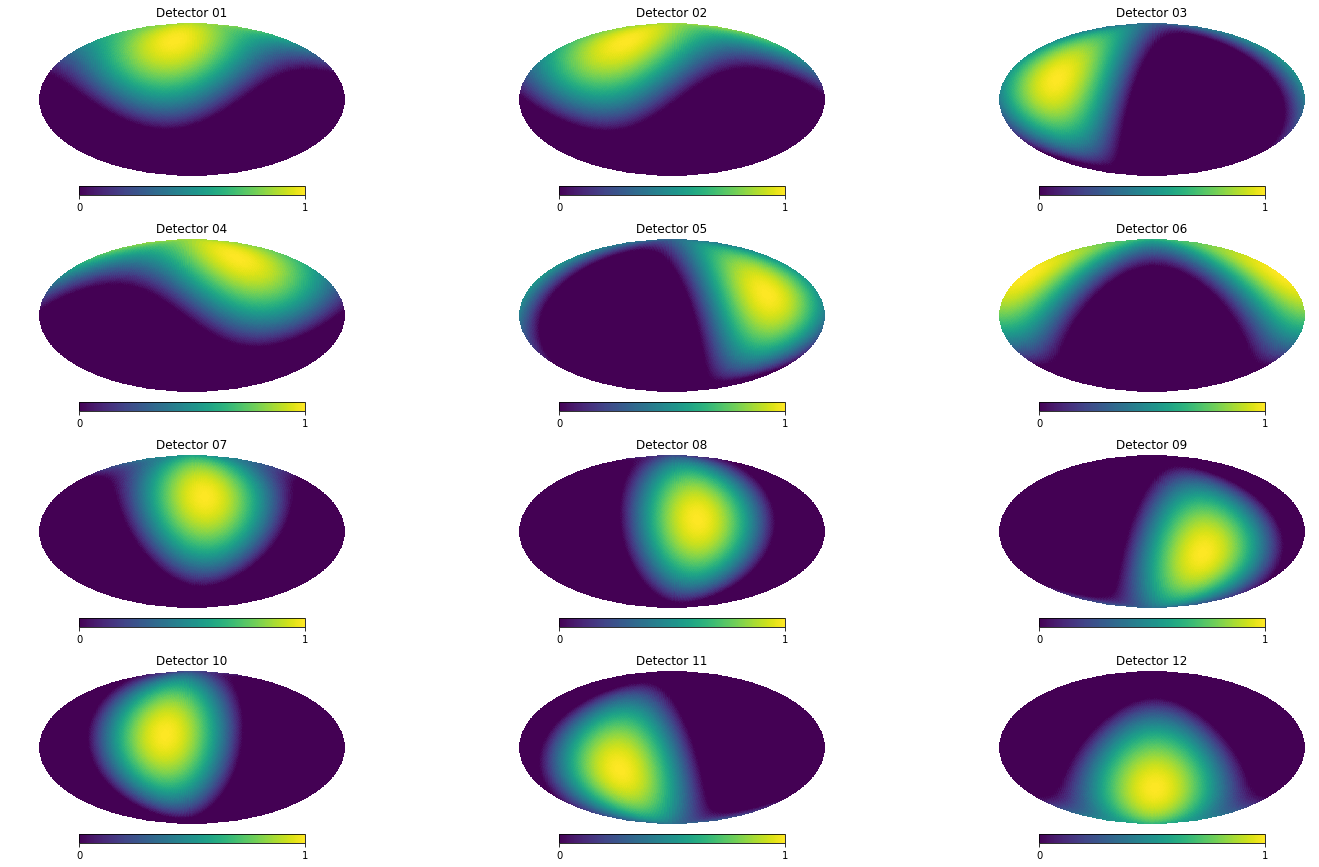

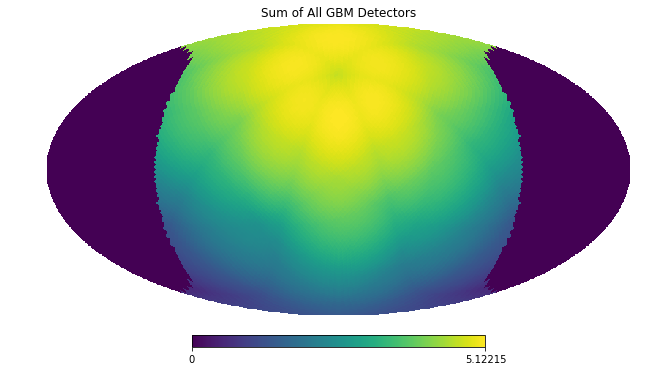

In [2]:
## setup GBM
gbm_pointings = {'01': ('45:54:0','20:36:0'),
            '02': ('45:6:0','45:18:0'),
            '03': ('58:24:0','90:12:0'),
            '04': ('314:54:0','45:12:0'),
            '05': ('303:12:0','90:18:0'),
            '06': ('3:24:0','89:48:0'),
            '07': ('224:54:0','20:24:0'),
            '08': ('224:36:0','46:12:0'),
            '09': ('236:36:0','90:0:0'),
            '10': ('135:12:0','45:36:0'),
            '11': ('123:42:0','90:24:0'),
            '12': ('183:42:0','90:18:0')}

npointings=len(gbm_pointings)
fermi = Spacecraft(gbm_pointings,lat='50:00:00',lon='260:00:00')
NSIDE = 32
exposure_positions_hp = np.arange(hp.nside2npix(NSIDE))
exposure_positions_pix = hp.pix2ang(NSIDE, exposure_positions_hp, lonlat=True)
exposure_positions = np.vstack(exposure_positions_pix)
gbm_exposures = np.array([[ detector.exposure(position[0],position[1], alt=-90.,index=1.0) for position in exposure_positions.T] 
                      for detector in fermi.detectors])

plot.figure(figsize=(20,npointings))
s=np.argsort(gbm_pointings.keys())
for j in range(npointings):
    i=s[j]
    hp.mollview(gbm_exposures[i]/max(gbm_exposures[i]),title='Detector '+gbm_pointings.keys()[i],\
                sub = [int(npointings/3.),3,int(str(j+1))])
gbm_exps=gbm_exposures.sum(axis=0)
gbm_fs=gbm_exps#-min(gbm_exps))/max(gbm_exps)
vec=hp.ang2vec(180,0,lonlat=True)
i=hp.query_disc(NSIDE,vec,67*np.pi/180.)
gbm_fs[i]=0
hp.mollview(gbm_fs,title='Sum of All GBM Detectors')#,max=2.5)

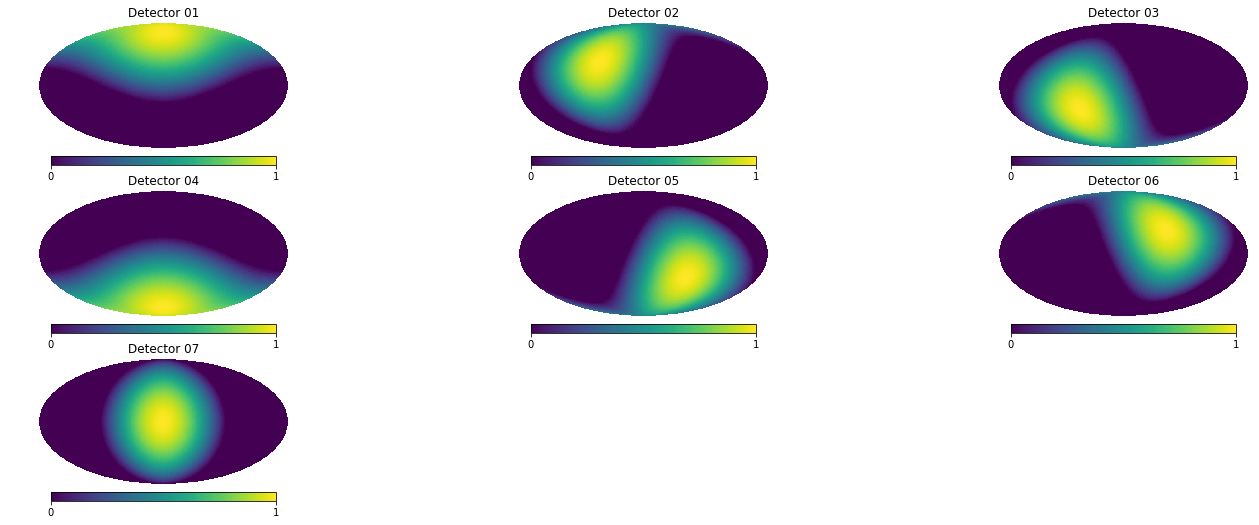

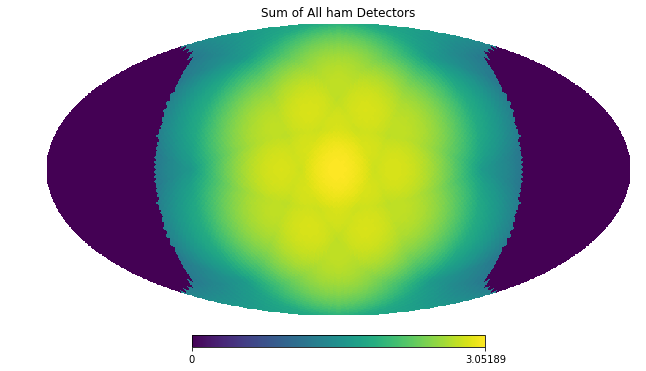

In [10]:
# # Nimble-HAM
ham_pointings = {'01': ('0:0:0','70:0:0'),
               '02': ('60:0:0','70:0:0'),
                '03': ('120:0:0','70:0:0'),
               '04': ('180:0:0','70:0:0'),
               '05': ('240:0:0','70:0:0'),
               '06': ('300:0:0','70:0:0'),
               '07': ('0:0:0','0:0:0')}

npointings=len(ham_pointings)
ham = Spacecraft(ham_pointings,lat='00:00:00',lon='260:00:00')
NSIDE = 32
exposure_positions_hp = np.arange(hp.nside2npix(NSIDE))
exposure_positions_pix = hp.pix2ang(NSIDE, exposure_positions_hp, lonlat=True)
exposure_positions = np.vstack(exposure_positions_pix)
ham_exposures = np.array([[ detector.exposure(position[0],position[1], alt=-90.,index=1) for position in exposure_positions.T] 
                      for detector in ham.detectors])

plot.figure(figsize=(20,npointings))
s=np.argsort(ham_pointings.keys())
for j in range(npointings):
    i=s[j]
    hp.mollview(ham_exposures[i]/max(ham_exposures[i]),title='Detector '+ham_pointings.keys()[i],\
                sub = [np.round(npointings/3.+0.5),3,int(str(j+1))])
exps=ham_exposures.sum(axis=0)
#ham_fs=(exps-min(exps))/max(exps)
ham_fs=exps#-min(gbm_exps))/max(gbm_exps)
vec=hp.ang2vec(180,0,lonlat=True)
i=hp.query_disc(NSIDE,vec,67*np.pi/180.)
ham_fs[i]=0
hp.mollview(ham_fs,title='Sum of All ham Detectors')#,max=2.5)


In [11]:
def plot_skewed_map(expratio,title=''):
    vmin_skewed = min(expratio)
    vmid_skewed =  1.0
    vmax_skewed = max(expratio)
    vstep = 0.05
    levels = np.arange(vmin_skewed, vmax_skewed+vstep, vstep)
    cmap = cm.get_cmap('bwr', len(levels)-1)
    deltamax = max(vmax_skewed-vmid_skewed, vmid_skewed-vmin_skewed)

    vfull = [ vmid_skewed-deltamax, vmid_skewed+deltamax]  # Full range either side of vmid
    #levfull = np.arange( vfull[0], vfull[1], vstep ) # Levels over full value range

    ncols = len(levels) -1 # number of colours we actually want to use

    vlo_frac = (vmin_skewed-vfull[0]) / (2.0*deltamax) # 0 or greater
    vhi_frac = (vmax_skewed-vfull[0]) / (2.0*deltamax) # 1 or less
    cmap_base = cm.get_cmap('bwr') # maps the range 0-1 to colours
    cols = cmap_base( np.linspace( vlo_frac, vhi_frac, ncols) )
    cmap_skewed = mpl_col.LinearSegmentedColormap.from_list('skewed',cols, N=ncols)
    cmap_skewed.set_bad('gray')
    cmap_skewed.set_under('w')

    #expratio=expratio/max(expratio)
    hp.mollview(expratio,title=title,cmap=cmap_skewed)

/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


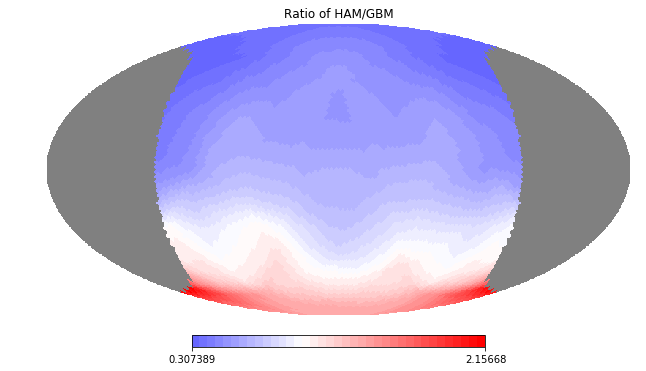

In [12]:
expratio=(ham_fs)/gbm_fs
plot_skewed_map(expratio,title='Ratio of HAM/GBM')

0.643509840675


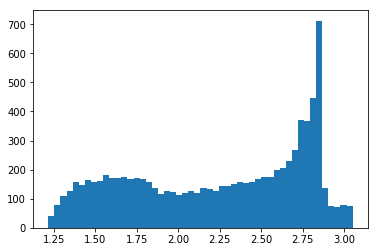

/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


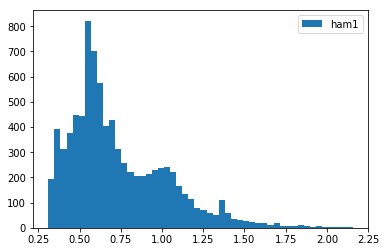

0.80752108716


/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less_equal
  # Remove the CWD from sys.path while we load stuff.
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


In [13]:
plot.figure()
plot.hist(ham_fs[ham_fs>0],bins=50)
print len(np.where(ham_fs>=2.)[0])*1./len(np.where(ham_fs>0)[0])
plot.show()
## fraction of visible sky in which GBM is more sensitive than ham
plot.figure()
h=plot.hist(expratio[expratio>min(expratio)],bins=50,label='ham1')
plot.legend()
plot.show()
w=np.where((expratio>0)&(expratio<=1))[0]
wdet=np.where(expratio>0)[0]
print float(len(w))/len(expratio[wdet])

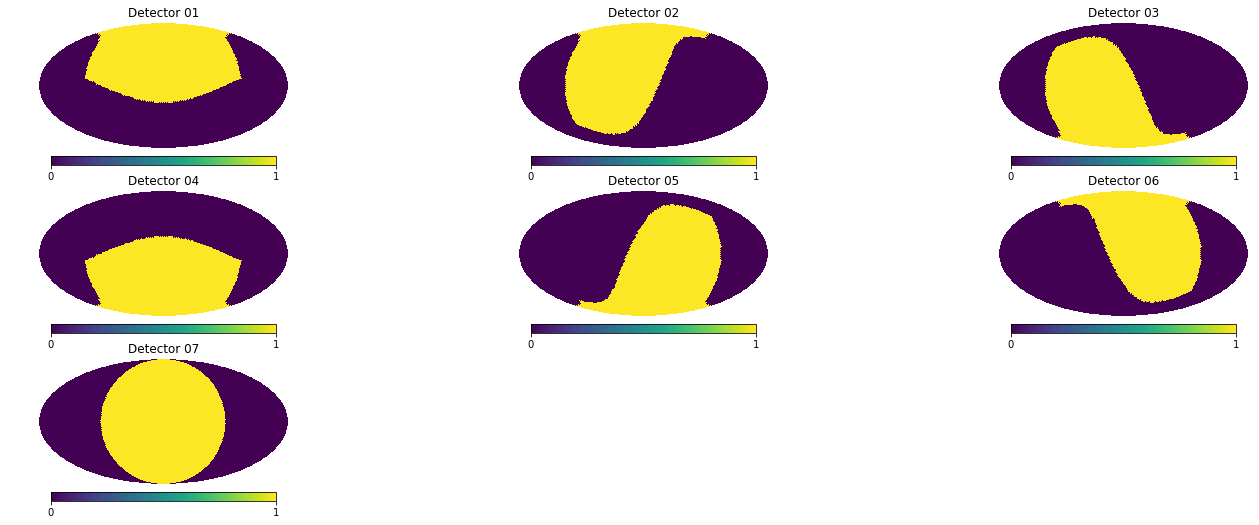

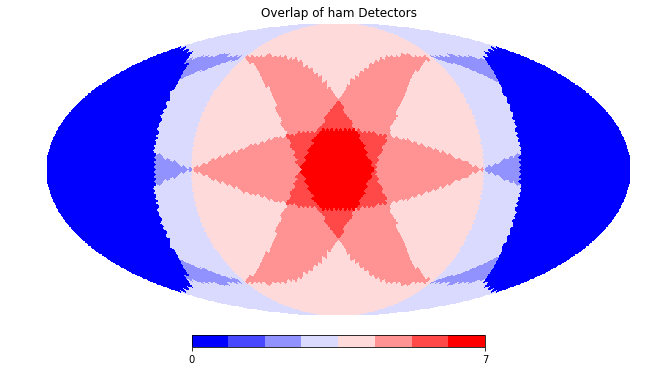

In [14]:
## evaluate detector overlap
ham_exposures = np.array([[ detector.exposure(position[0],position[1], alt=-23.,index=0) for position in exposure_positions.T] 
                      for detector in ham.detectors])

plot.figure(figsize=(20,npointings))
s=np.argsort(ham_pointings.keys())
for j in range(npointings):
    i=s[j]
    hp.mollview(ham_exposures[i]/max(ham_exposures[i]),title='Detector '+ham_pointings.keys()[i],\
                sub = [np.round(npointings/3.+0.5),3,int(str(j+1))])
exps=ham_exposures.sum(axis=0)
#ham_fs=(exps-min(exps))/max(exps)
ham_fs_det=exps#-min(gbm_exps))/max(gbm_exps)

vmin_skewed = -1.0
vmid_skewed =  3.0
vmax_skewed = 7.0
vstep = 1.0
levels = np.arange(vmin_skewed, vmax_skewed+vstep, vstep)
cmap = cm.get_cmap('bwr', len(levels)-1)
deltamax = max(vmax_skewed-vmid_skewed, vmid_skewed-vmin_skewed)

vfull = [ vmid_skewed-deltamax, vmid_skewed+deltamax]  # Full range either side of vmid
#levfull = np.arange( vfull[0], vfull[1], vstep ) # Levels over full value range
 
ncols = len(levels) -1 # number of colours we actually want to use
 
vlo_frac = (vmin_skewed-vfull[0]) / (2.0*deltamax) # 0 or greater
vhi_frac = (vmax_skewed-vfull[0]) / (2.0*deltamax) # 1 or less
cmap_base = cm.get_cmap('bwr') # maps the range 0-1 to colours
cols = cmap_base( np.linspace( vlo_frac, vhi_frac, ncols) )
cmap_skewed = mpl_col.LinearSegmentedColormap.from_list('skewed',cols, N=ncols)
cmap_skewed.set_bad('gray')
cmap_skewed.set_under('w')

hp.mollview(ham_fs_det,title='Overlap of ham Detectors',cmap=cmap_skewed)#,cmap=cmap)#,max=2.5)